In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from dateutil.relativedelta import relativedelta
import housing_sim.utils
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import datetime as dt

from housing_sim.mortgage.fixed_rate import SimpleFixedRateMortgage
from housing_sim.housing.simple_home import SimpleHome
from housing_sim.housing.apartment import Apartment

In [2]:
interest = 0.0425
purchase_price = 250000
down_payment_pct = 0.20
months = 360
start = dt.date(2020,1,1)
base_rent = 1000

In [3]:
my_mortgage = SimpleFixedRateMortgage(interest, purchase_price, down_payment_pct, start, months)

In [4]:
my_home = SimpleHome(purchase_price, my_mortgage)

In [5]:
my_apartment = Apartment(base_rent, start, months)

In [6]:
# Plotting setup
style.use('seaborn-poster')
style.use('fivethirtyeight')

In [7]:
%%markdown

# Mortgage


# Mortgage


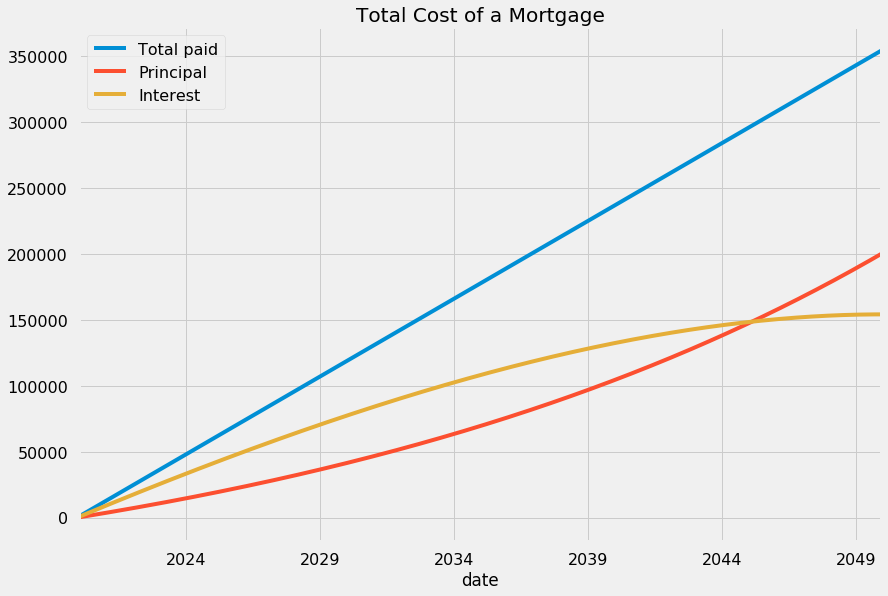

In [8]:
data = my_mortgage.get_data().copy()
data['total_paid'] = data['total_principal'] + data['total_interest']
ax = data.plot(kind='line', x='date', y=['total_paid', 'total_principal', 'total_interest'], 
              title='Total Cost of a Mortgage')
ax.legend(['Total paid', 'Principal', 'Interest'])
plt.show()

In [9]:
data[['total_paid', 'total_principal', 'total_interest']].describe()

,total_paid,total_principal,total_interest
count,360.000000,360.000000,360.000000
mean,177590.300680,79616.950397,97973.350283
std,102389.698607,57159.576656,46892.555804
min,983.879782,275.546449,708.333333
25%,89287.090231,29431.044299,59856.045932
50%,177590.300680,69473.681927,108116.618752
75%,265893.511128,124468.852239,141424.658890
max,354196.721577,200000.000000,154196.721577


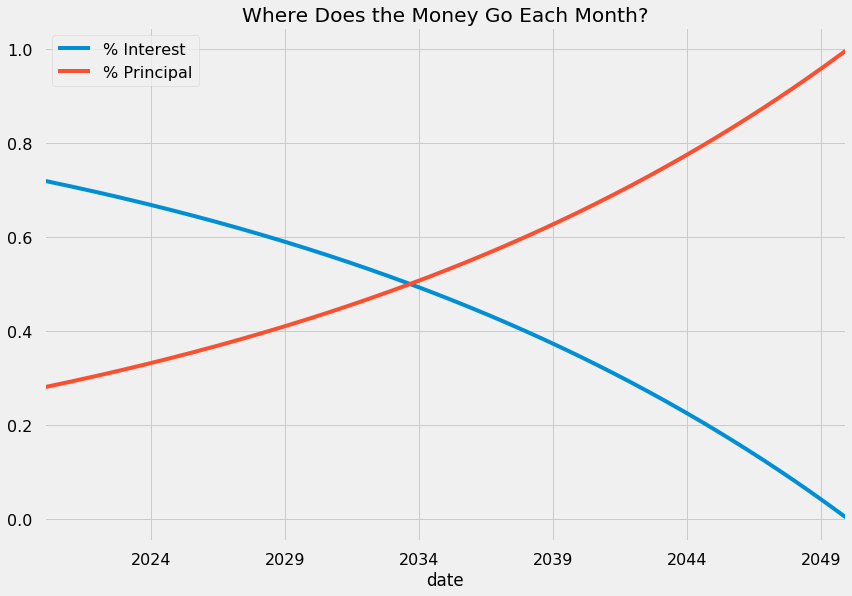

In [10]:
data = my_mortgage.get_data().copy()
data['payment'] = data['principal'] + data['interest']
data['% Interest'] = data['interest'] / data['payment']
data['% Principal'] = data['principal'] / data['payment']
ax = data.plot(kind='line', x='date', y=['% Interest', '% Principal'], 
              title='Where Does the Money Go Each Month?')
ax.legend(['% Interest', '% Principal'])
plt.show()

In [11]:
data[['% Interest', '% Principal']].describe()

,% Interest,% Principal
count,360.000000,360.000000
mean,0.435342,0.564658
std,0.205031,0.205031
min,0.003529,0.280061
25%,0.274459,0.384642
50%,0.471726,0.528274
75%,0.615358,0.725541
max,0.719939,0.996471


In [12]:
#my_mortgage.get_data().head()

In [13]:
#my_mortgage.get_data().tail()

In [14]:
%%markdown

# Home Ownership


# Home Ownership


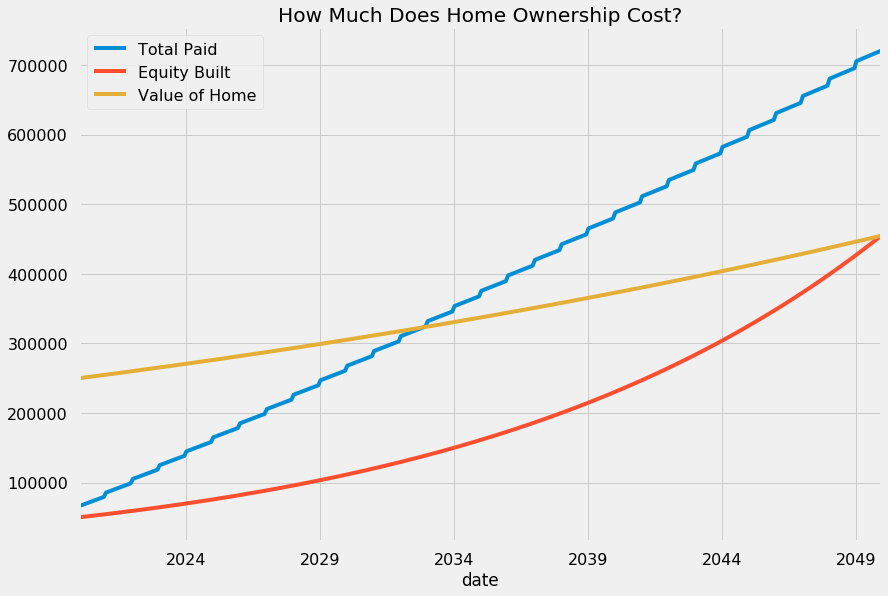

In [15]:
data = my_home.get_data()
data['total'] = data['total_direct'] + data['total_indirect']
data['equity'] = data['home_value'] * data['home_ownership_pct']
ax = data.plot(kind='line', x='date', y=['total', 'equity', 'home_value'], 
              title='How Much Does Home Ownership Cost?')
ax.legend(['Total Paid', 'Equity Built', 'Value of Home'])
plt.show()

In [16]:
data[['total', 'equity', 'home_value']].describe()

,total,equity,home_value
count,360.000000,360.000000,360.000000
mean,379114.530842,190835.673447,342170.408015
std,191021.153290,114002.884096,59122.144064
min,66333.333333,50275.546449,250000.000000
25%,212763.681530,92235.938682,290301.487974
50%,371518.362936,161098.489016,337099.757301
75%,541616.485502,273178.171916,391442.108926
max,720416.061947,454544.670359,454544.670359


In [17]:
%%markdown

# Direct vs Indirect Costs


# Direct vs Indirect Costs


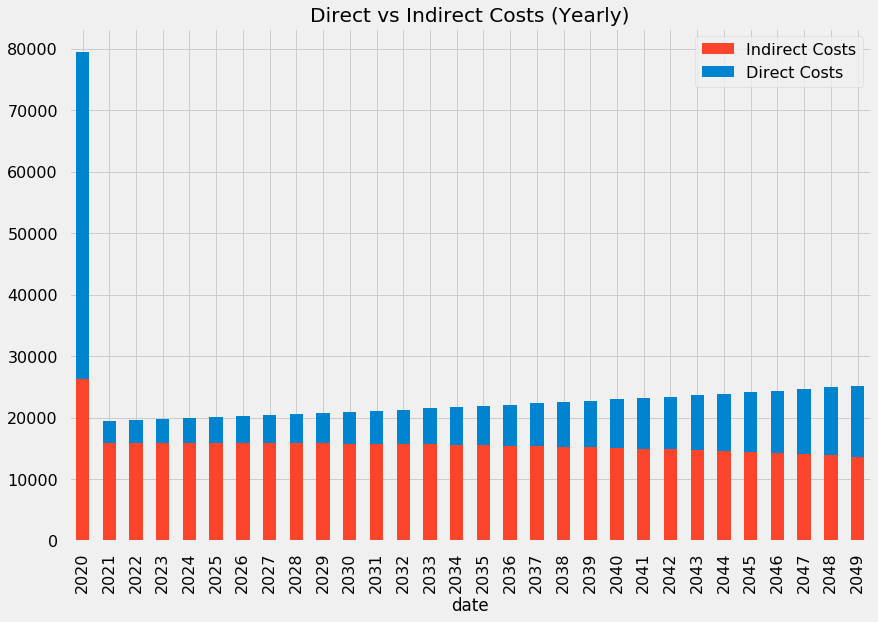

In [18]:
data = my_home.get_data().copy()
data = data.groupby(data['date'].dt.year).sum().reset_index()
ax = data.plot(kind='bar', x='date', y=['indirect','direct'], color=['#FC452B', '#0084CF'],
                  title='Direct vs Indirect Costs (Yearly)', stacked=True)
ax.legend(['Indirect Costs', 'Direct Costs'])
plt.show()

In [19]:
data[['indirect','direct']].describe()

,indirect,direct
count,30.000000,30.000000
mean,15689.720280,8324.148452
std,2129.859252,8783.817926
min,13697.324598,3517.856047
25%,14940.300055,4785.556416
50%,15619.678503,6509.339473
75%,15915.995445,8853.042713
max,26374.535667,53096.186397


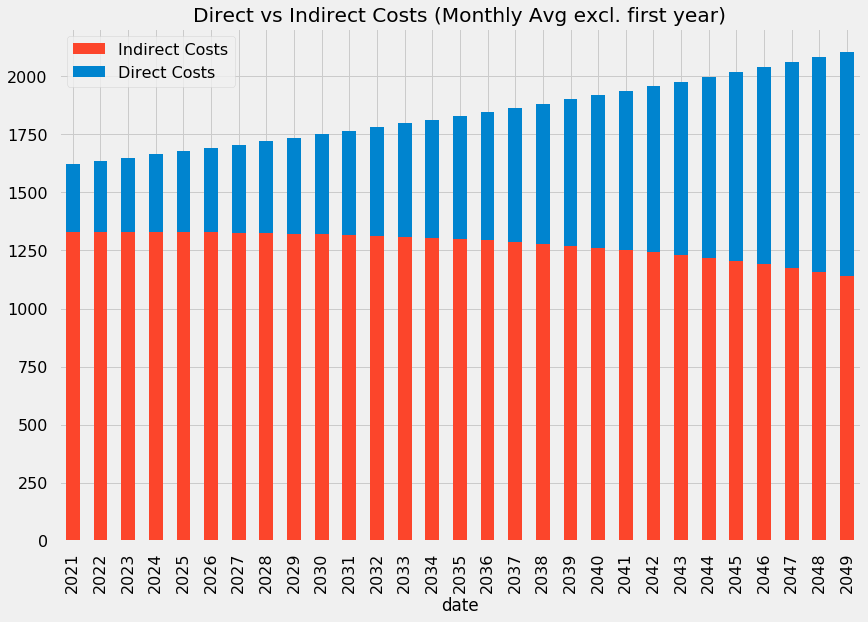

In [20]:
data = my_home.get_data().copy()
data = data.groupby(data['date'].dt.year).sum().reset_index()
data['direct'] /= 12
data['indirect'] /= 12
data = data[1:]
ax = data.plot(kind='bar', x='date', y=['indirect','direct'], color=['#FC452B', '#0084CF'],
                  title='Direct vs Indirect Costs (Monthly Avg excl. first year)', stacked=True)
ax.legend(['Indirect Costs', 'Direct Costs'])
plt.show()

In [21]:
data[['indirect','direct']].describe()

,indirect,direct
count,29.000000,29.000000
mean,1276.773197,565.023756
std,57.758002,201.587802
min,1141.443716,293.154671
25%,1242.418091,394.521948
50%,1298.982375,530.940091
75%,1324.957728,714.529017
max,1330.504209,961.599483


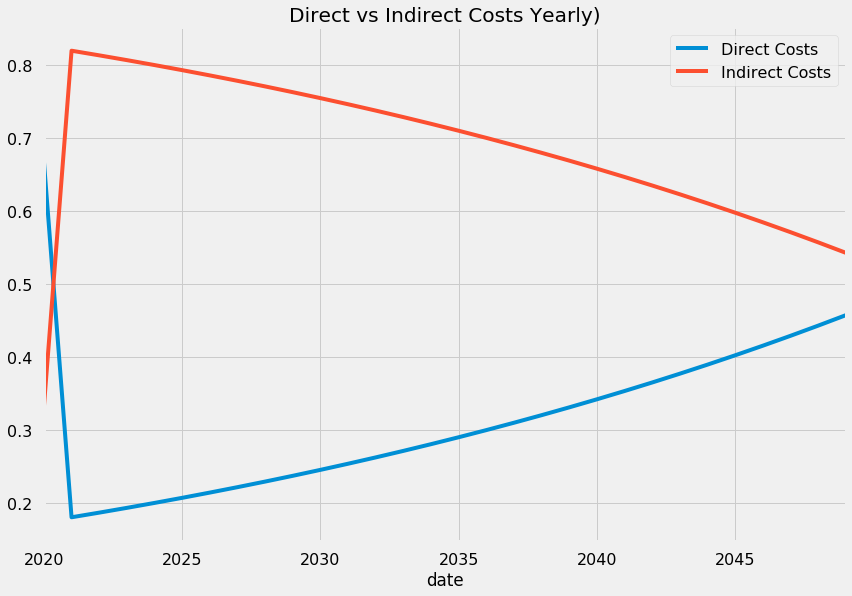

In [22]:
data = my_home.get_data().copy()
data = data.groupby(data['date'].dt.year).sum().reset_index()
data['% Indirect'] = data['indirect'] / (data['indirect'] + data['direct'])
data['% Direct'] = data['direct'] / (data['indirect'] + data['direct'])
ax = data.plot(kind='line', x='date', y=['% Direct','% Indirect'],
                  title='Direct vs Indirect Costs Yearly)')
ax.legend(['Direct Costs', 'Indirect Costs'])
plt.show()

In [23]:
data[['% Direct','% Indirect']].describe()

,% Direct,% Indirect
count,30.000000,30.000000
mean,0.312640,0.687360
std,0.106310,0.106310
min,0.180575,0.331877
25%,0.231416,0.625847
50%,0.295031,0.704969
75%,0.374153,0.768584
max,0.668123,0.819425


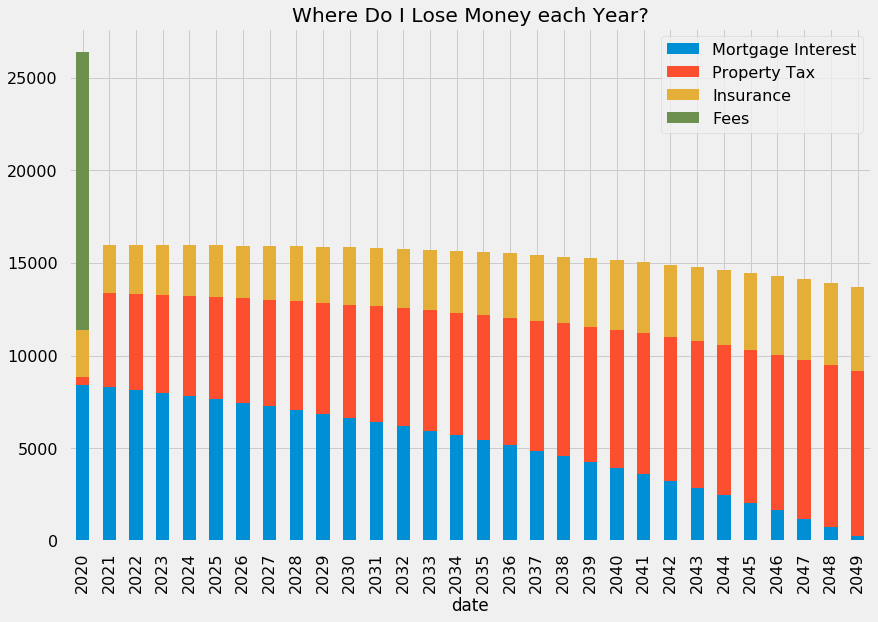

In [24]:
my_home.get_data()
data = my_home.indirect_cost_data.copy()
data['date'] = my_home.data['date']
data = data.groupby(data['date'].dt.year).sum().reset_index()
ax = data.plot(kind='bar', x='date', y=['interest', 'property_tax','homeowners_insurance', 'fees'], 
               title='Where Do I Lose Money each Year?', stacked=True)
ax.legend(['Mortgage Interest', 'Property Tax', 'Insurance', 'Fees'])
plt.show()

In [25]:
data[['interest', 'property_tax','homeowners_insurance', 'fees']].describe()

,interest,property_tax,homeowners_insurance,fees
count,30.000000,30.000000,30.000000,30.000000
mean,5139.890719,6628.125480,3421.704080,500.000000
std,2457.093361,1636.362007,600.149484,2738.612788
min,267.363585,416.666667,2523.044460,0.000000
25%,3321.248579,5779.717322,2916.496754,0.000000
50%,5567.600074,6680.858050,3371.220379,0.000000
75%,7219.781368,7722.306798,3896.744677,0.000000
max,8434.824540,8925.881725,4504.079288,15000.000000


In [26]:
# %%markdown

# # Rent

In [27]:
# data = my_apartment.get_data()
# ax = data.plot(kind='line', x='date', y=['total_rent'], 
#               title='How Much Rent Do I Pay?')
# ax.legend(['Rent'])
# plt.show()

In [28]:
%%markdown

# Comparing Rent vs Home Ownership


# Comparing Rent vs Home Ownership


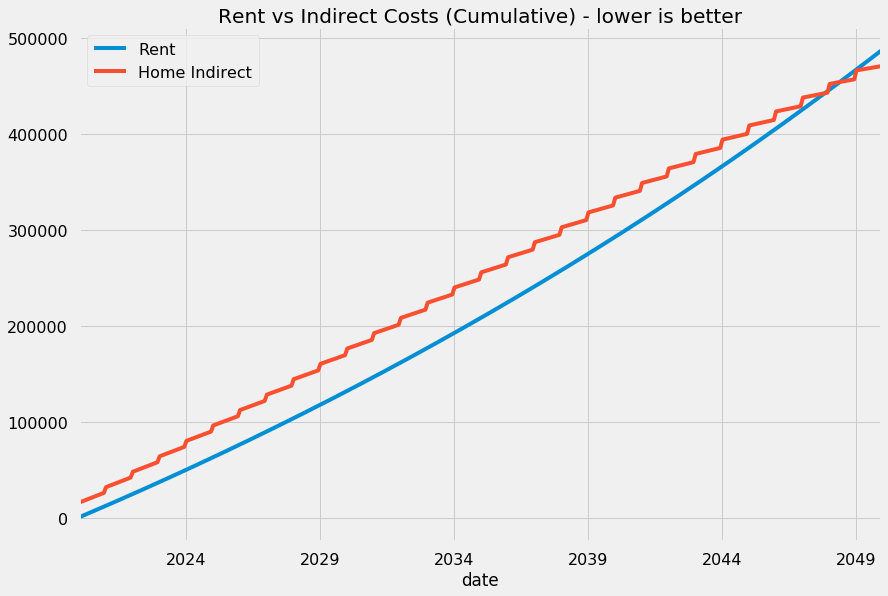

In [29]:
data = my_home.get_data()
data['total_rent'] = my_apartment.get_data()['total_rent']
ax = data.plot(kind='line', x='date', y=['total_rent', 'total_indirect'], 
              title='Rent vs Indirect Costs (Cumulative) - lower is better')
ax.legend(['Rent', 'Home Indirect'])
plt.show()

In [30]:
data[['total_rent', 'total_indirect']].describe()

,total_rent,total_indirect
count,360.000000,360.000000
mean,220151.334598,249773.126894
std,140436.159770,134514.805126
min,1000.000000,16333.333333
25%,96965.028846,133608.183680
50%,208193.937164,252320.227458
75%,337250.175408,367423.179712
max,486816.950462,470691.608396


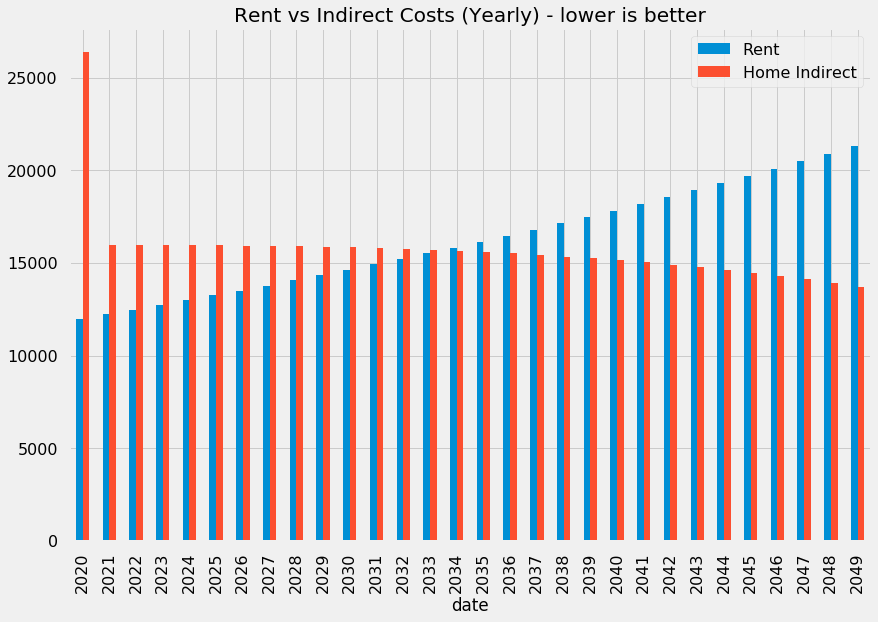

In [31]:
data = my_home.get_data().join(my_apartment.get_data()[['rent', 'total_rent']])
data = data.groupby(data['date'].dt.year).sum().reset_index()
ax = data.plot(kind='bar', x='date', y=['rent', 'indirect'], 
              title='Rent vs Indirect Costs (Yearly) - lower is better')
ax.legend(['Rent', 'Home Indirect'])
plt.show()

In [32]:
data[['rent', 'indirect']].describe()

,rent,indirect
count,30.000000,30.000000
mean,16227.231682,15689.720280
std,2820.585220,2129.859252
min,12000.000000,13697.324598
25%,13853.149152,14940.300055
50%,15992.082608,15619.678503
75%,18460.816069,15915.995445
max,21310.136284,26374.535667


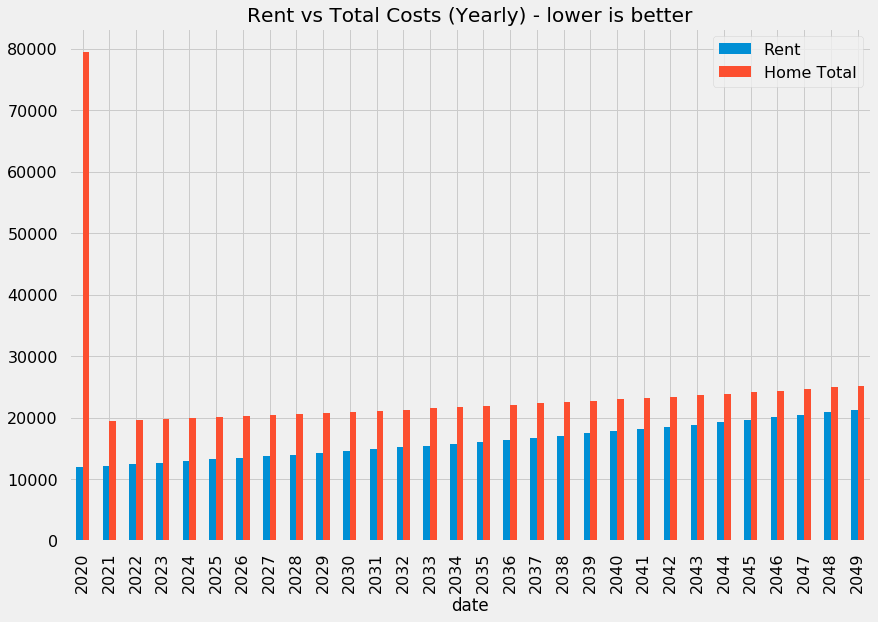

In [33]:
data = my_home.get_data().join(my_apartment.get_data()[['rent', 'total_rent']])
data = data.groupby(data['date'].dt.year).sum().reset_index()
data['total'] = data['direct'] + data['indirect']

ax = data.plot(kind='bar', x='date', y=['rent', 'total'], 
              title='Rent vs Total Costs (Yearly) - lower is better')
ax.legend(['Rent', 'Home Total'])
plt.show()

In [34]:
data[['rent', 'total']].describe()

,rent,total
count,30.000000,30.000000
mean,16227.231682,24013.868732
std,2820.585220,10613.834259
min,12000.000000,19481.449651
25%,13853.149152,20678.298941
50%,15992.082608,22061.530541
75%,18460.816069,23660.131929
max,21310.136284,79470.722064


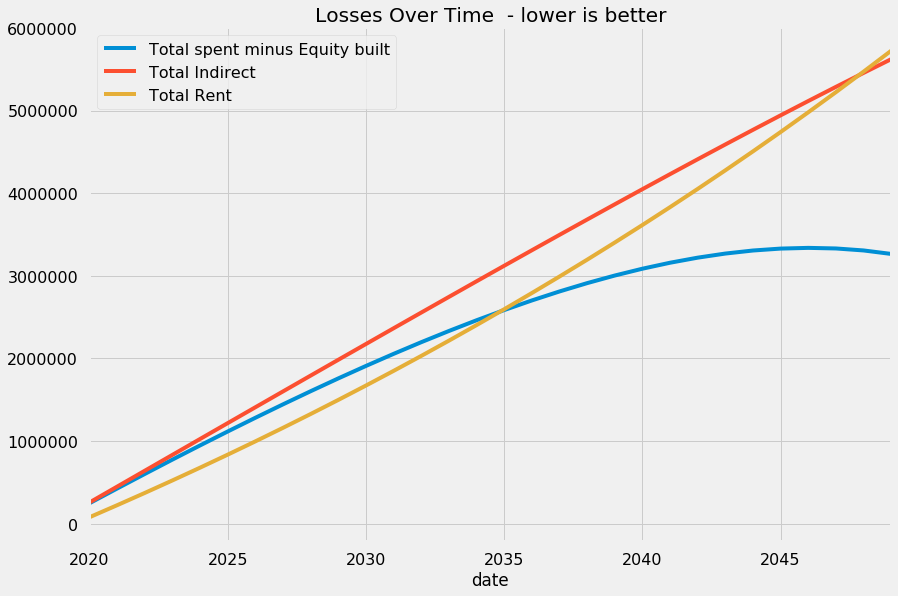

In [35]:
data = my_home.get_data().join(my_apartment.get_data()[['rent','total_rent']])
data['equity'] = data['home_value'] * data['home_ownership_pct']
data['total'] = data['total_direct'] + data['total_indirect']
data['net_loss'] =  data['total'] - data['equity']
data = data.groupby(data['date'].dt.year).sum().reset_index()
ax = data.plot(kind='line', x='date', y=['net_loss', 'total_indirect', 'total_rent'], 
              title='Losses Over Time  - lower is better')
ax.legend(['Total spent minus Equity built','Total Indirect', 'Total Rent'])
plt.show()

In [36]:
data[['net_loss', 'total_indirect', 'total_rent']].describe()

,net_loss,total_indirect,total_rent
count,3.000000e+01,3.000000e+01,3.000000e+01
mean,2.259346e+06,2.997278e+06,2.641816e+06
std,1.010179e+06,1.639203e+06,1.710685e+06
min,2.472125e+05,2.563181e+05,7.800000e+04
25%,1.483979e+06,1.648581e+06,1.201935e+06
50%,2.523666e+06,3.027450e+06,2.499198e+06
75%,3.204546e+06,4.365610e+06,3.996485e+06
max,3.338434e+06,5.622453e+06,5.724598e+06


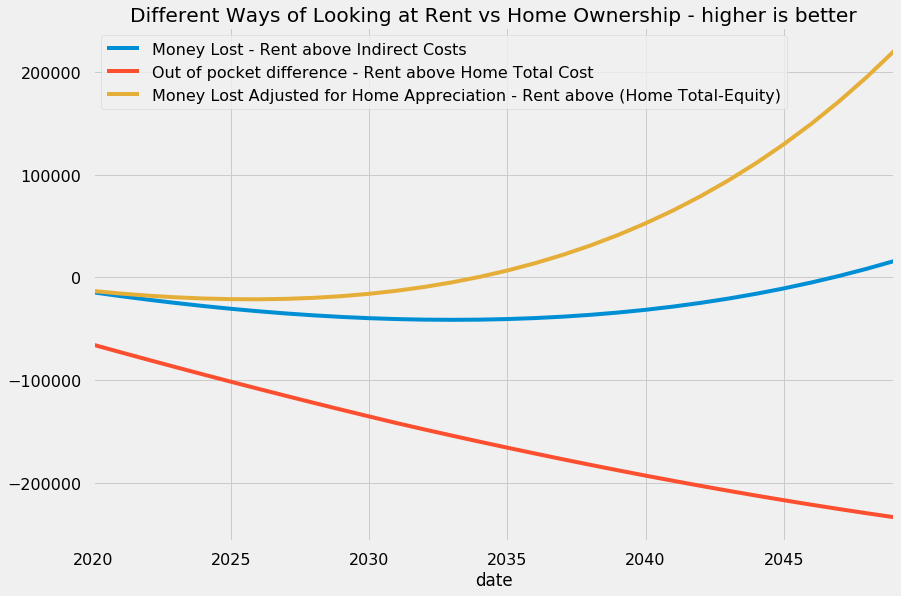

In [37]:
data = my_home.get_data().join(my_apartment.get_data()[['rent','total_rent']])
data['equity'] = data['home_value'] * data['home_ownership_pct']
data['total'] = data['total_direct'] + data['total_indirect']
data['rent_vs_indirect'] = data['total_rent'] - data['total_indirect']
data['rent_vs_net_loss'] = data['total_rent'] - (data['total'] - data['equity'])
data['oop_diff'] = data['total_rent'] - data['total']
data = data.groupby(data['date'].dt.year).max()
ax = data.plot(kind='line', x='date', y=['rent_vs_indirect', 'oop_diff', 'rent_vs_net_loss'], 
              title='Different Ways of Looking at Rent vs Home Ownership - higher is better')
ax.legend(['Money Lost - Rent above Indirect Costs ', 
           'Out of pocket difference - Rent above Home Total Cost',
           'Money Lost Adjusted for Home Appreciation - Rent above (Home Total-Equity)'])
plt.show()

In [38]:
data[['rent_vs_indirect', 'oop_diff', 'rent_vs_net_loss']].describe()

,rent_vs_indirect,oop_diff,rent_vs_net_loss
count,30.000000,30.000000,30.000000
mean,-26090.628861,-158063.778000,38578.814947
std,15556.855339,51451.780184,72722.114404
min,-41235.420156,-233599.111485,-21234.070846
25%,-38354.681254,-201787.520528,-17223.395968
50%,-30976.843109,-162895.365230,3717.452976
75%,-18704.529694,-117053.911394,75866.592961
max,16125.342066,-65333.333333,220945.558874


In [39]:
print("Home\nPurchase price ${:.2f}. \nYearly appreciation rate: {:.2f}%".format(my_home.purchase_price, my_home.appreciation_rate*100))
print("\nMortgage\n${:.2f} fixed payment. \nYearly interest rate: {:.2f}%. \nDown payment: {:.2f}%".format(my_mortgage.fixed_monthly_payment_size, my_mortgage.interest_rate*100, my_mortgage.down_payment_pct*100))
print("\nRent: \n${}/month. \nYearly increase rate: {:.2f}%".format(my_apartment.base_rent, my_apartment.yearly_increase_rate*100))


Home
Purchase price $250000.00. 
Yearly appreciation rate: 2.00%

Mortgage
$983.88 fixed payment. 
Yearly interest rate: 4.25%. 
Down payment: 20.00%

Rent: 
$1000/month. 
Yearly increase rate: 2.00%


In [40]:
%%markdown

## Graph Summary
### **Money Lost - Rent above Indirect Costs:**
Considering only rent vs our indirect expenses of insurance, interest, property taxes, and fees. 

Renting starts out cheaper, but as the main indirect expense-mortgage interest-decreases,
renting becomes more expensinve towards the very end of the mortgage.

### **Out of pocket difference - Rent above Home Total Cost:**
Considering the TOTAL cost of home ownership vs renting. This is how much money gets spent, whether it goes
towards building equity or not.

### **Money Lost Adjusted for Home Appreciation - Rent above (Home Total-Equity):**
Homes generally appreciate in value. Instead of measuring total indirect costs as our "cost of home ownership",
instead we should measure the total amount spent on the home, minus the amount of equity we've built up.
With each principal payment we make, we own more and more of our house. 
This makes the difference in our net worth smaller than if we were only considering indirect costs.


## Graph Summary
### **Money Lost - Rent above Indirect Costs:**
Considering only rent vs our indirect expenses of insurance, interest, property taxes, and fees. 

Renting starts out cheaper, but as the main indirect expense-mortgage interest-decreases,
renting becomes more expensinve towards the very end of the mortgage.

### **Out of pocket difference - Rent above Home Total Cost:**
Considering the TOTAL cost of home ownership vs renting. This is how much money gets spent, whether it goes
towards building equity or not.

### **Money Lost Adjusted for Home Appreciation - Rent above (Home Total-Equity):**
Homes generally appreciate in value. Instead of measuring total indirect costs as our "cost of home ownership",
instead we should measure the total amount spent on the home, minus the amount of equity we've built up.
With each principal payment we make, we own more and more of our house. 
This makes the difference in our net worth smaller than if we were only considering indirect costs.


In [41]:
%%markdown

# Simulating Rental Income

Let's be real - with all of the additional space we'll have with a house, we should consider renting out a room.
That being said, I only want to do it for the first few years to make owning a home more affordable upfront.

## Guide
### Additional out of pocket
Consider the difference between paying rent and the total cost of home ownership. 
This is the net difference we'd pay above renting.

`additional out of pocket = (total cost of home - rental income) - total rent we'd pay if we were renting`

### Total out of pocket
The straight total cost of home ownership

`total out of pocket = total cost - rental income`

### Net loss
The net loss in total wealth.

`net loss = total cost - equity - rental income`


# Simulating Rental Income

Let's be real - with all of the additional space we'll have with a house, we should consider renting out a room.
That being said, I only want to do it for the first few years to make owning a home more affordable upfront.

## Guide
### Additional out of pocket
Consider the difference between paying rent and the total cost of home ownership. 
This is the net difference we'd pay above renting.

`additional out of pocket = (total cost of home - rental income) - total rent we'd pay if we were renting`

### Total out of pocket
The straight total cost of home ownership

`total out of pocket = total cost - rental income`

### Net loss
The net loss in total wealth.

`net loss = total cost - equity - rental income`


In [42]:
# renting a room for the first couple years
rental_income_rates = np.arange(500*12, 1100*12, 100*12)
rental_years = 7
rental_incomes = rental_income_rates.repeat(rental_years).reshape(len(rental_income_rates), rental_years)
total_years = data.shape[0]
nonrental_incomes = np.zeros((rental_incomes.shape[0], total_years-rental_years))
monthly_incomes = np.hstack((rental_incomes, nonrental_incomes))
data2 = data[['oop_diff', 'total', 'equity', 'total_rent', 'date']].copy().drop('date', axis=1).reset_index()
data2['No room rental (ADDL)'] = -1 * data2['oop_diff']
data2['No room rental (T)'] = data2['total']
data2['No room rental (Net)'] = data2['total'] - data2['equity']
be_renter = 'Being the renter starting at ${:.0f}/mo (Net)'.format(my_apartment.base_rent)
data2[be_renter] = data2['total_rent']
addl_oop_colnames = ['No room rental (ADDL)']
total_oop_colnames = ['No room rental (T)']
net_loss_colnames = ['No room rental (Net)', be_renter]
for i in range(len(rental_income_rates)):
    income_rate = rental_income_rates[i]
    rent_colname_base = 'Rent room at ${:.0f}/mo for first {} years'.format(income_rate/12, rental_years)
    addl_oop_colname = rent_colname_base + " (ADDL)"
    addl_oop_colnames.append(addl_oop_colname)
    total_oop_colname = rent_colname_base + " (T)"
    total_oop_colnames.append(total_oop_colname)
    net_loss_colname = rent_colname_base + " (Net)"
    net_loss_colnames.append(net_loss_colname)
    rent_collected = pd.Series(monthly_incomes[i]).expanding(min_periods=1).sum()
    data2['rent collected {}'.format(income_rate)] = rent_collected
    data2[addl_oop_colname] = data2['No room rental (ADDL)'] - rent_collected 
    data2[total_oop_colname] = data2['total'] - rent_collected
    data2[net_loss_colname] = data2['No room rental (Net)'] - rent_collected

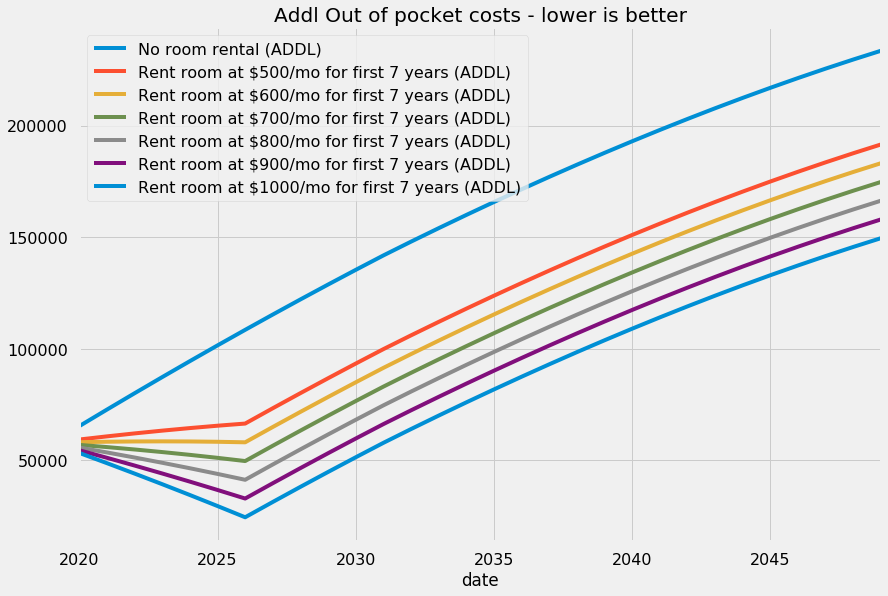

In [43]:
ax = data2.plot(kind='line', x='date', y=addl_oop_colnames, 
              title='Addl Out of pocket costs - lower is better')
plt.show()

In [44]:
data2[addl_oop_colnames].describe()

,No room rental (ADDL),Rent room at $500/mo for first 7 years (ADDL),Rent room at $600/mo for first 7 years (ADDL),Rent room at $700/mo for first 7 years (ADDL),Rent room at $800/mo for first 7 years (ADDL),Rent room at $900/mo for first 7 years (ADDL),Rent room at $1000/mo for first 7 years (ADDL)
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,158063.778000,120263.778000,112703.778000,105143.778000,97583.778000,90023.778000,82463.778000
std,51451.780184,45192.105982,44091.572129,43050.951230,42074.688949,41167.364232,40333.629700
min,65333.333333,59333.333333,58090.741535,49690.741535,41290.741535,32890.741535,24490.741535
25%,117053.911394,75053.911394,66653.911394,58533.381366,55133.477431,51662.868246,45792.480675
50%,162895.365230,120895.365230,112495.365230,104095.365230,95695.365230,87295.365230,78895.365230
75%,201787.520528,159787.520528,151387.520528,142987.520528,134587.520528,126187.520528,117787.520528
max,233599.111485,191599.111485,183199.111485,174799.111485,166399.111485,157999.111485,149599.111485


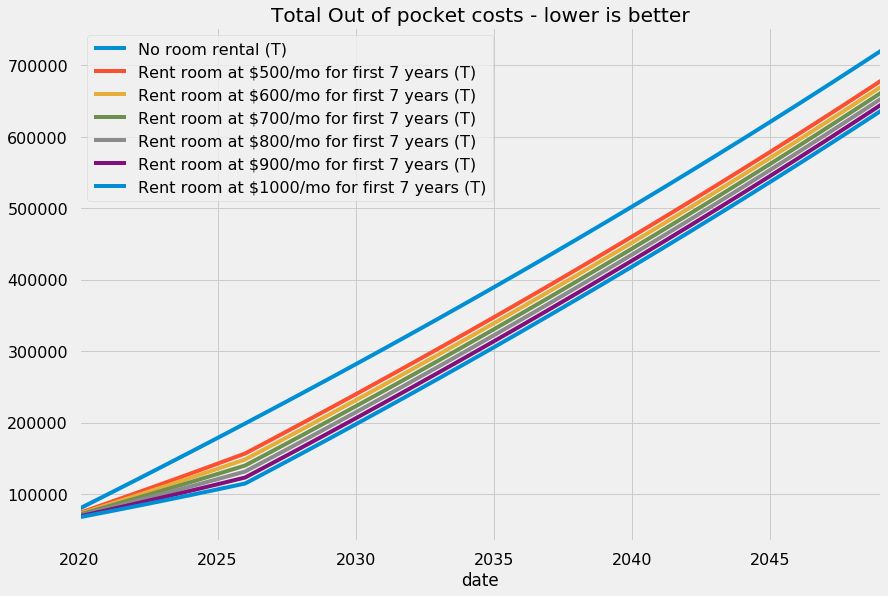

In [45]:
ax = data2.plot(kind='line', x='date', y=total_oop_colnames, 
              title='Total Out of pocket costs - lower is better')
plt.show()

In [46]:
data2[total_oop_colnames].describe()

,No room rental (T),Rent room at $500/mo for first 7 years (T),Rent room at $600/mo for first 7 years (T),Rent room at $700/mo for first 7 years (T),Rent room at $800/mo for first 7 years (T),Rent room at $900/mo for first 7 years (T),Rent room at $1000/mo for first 7 years (T)
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,386099.809165,348299.809165,340739.809165,333179.809165,325619.809165,318059.809165,310499.809165
std,194241.240579,188266.544563,187109.460988,185965.551543,184835.060822,183718.236539,182615.329433
min,79470.722064,73470.722064,72270.722064,71070.722064,69870.722064,68670.722064,67470.722064
25%,224364.150885,182364.150885,173964.150885,165564.150885,157164.150885,148764.150885,140364.150885
50%,378491.578254,336491.578254,328091.578254,319691.578254,311291.578254,302891.578254,294491.578254
75%,543289.140030,501289.140030,492889.140030,484489.140030,476089.140030,467689.140030,459289.140030
max,720416.061947,678416.061947,670016.061947,661616.061947,653216.061947,644816.061947,636416.061947


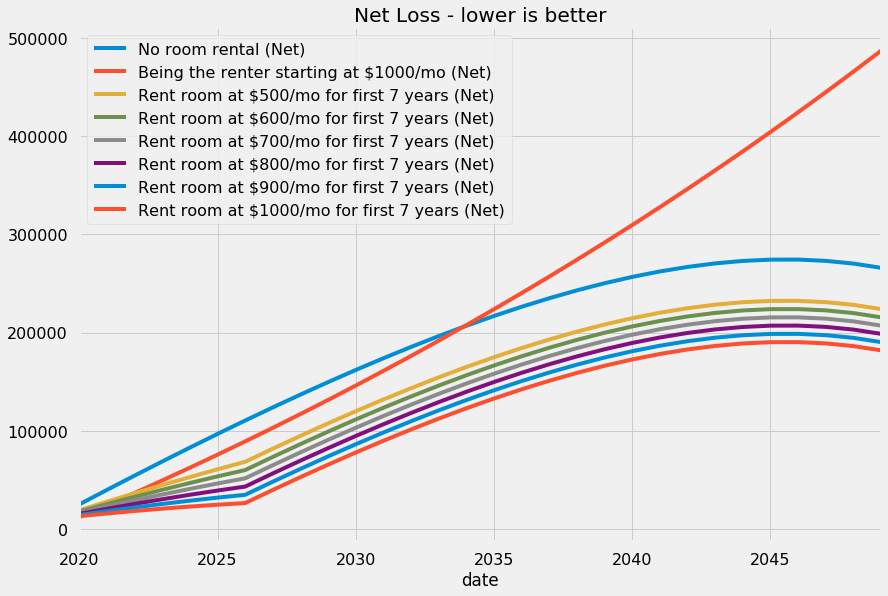

In [47]:
ax = data2.plot(kind='line', x='date', y=net_loss_colnames,
              title='Net Loss - lower is better')
plt.show()

In [48]:
data2[net_loss_colnames].describe()

,No room rental (Net),Being the renter starting at $1000/mo (Net),Rent room at $500/mo for first 7 years (Net),Rent room at $600/mo for first 7 years (Net),Rent room at $700/mo for first 7 years (Net),Rent room at $800/mo for first 7 years (Net),Rent room at $900/mo for first 7 years (Net),Rent room at $1000/mo for first 7 years (Net)
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,189010.000839,227588.815785,151210.000839,143650.000839,136090.000839,128530.000839,120970.000839,113410.000839
std,81394.570265,143849.846217,74203.604433,72836.301508,71495.846754,70183.778525,68901.718501,67651.372758
min,25112.312528,12000.000000,19112.312528,17912.312528,16712.312528,15512.312528,14312.312528,13112.312528
25%,127069.541448,106510.606744,85069.541448,76669.541448,68269.541448,59869.541448,51469.541448,43069.541448
50%,211878.760049,215596.213024,169878.760049,161478.760049,153078.760049,144678.760049,136278.760049,127878.760049
75%,264947.889338,341501.619503,222947.889338,214547.889338,206147.889338,197747.889338,189347.889338,180947.889338
max,274253.275804,486816.950462,232253.275804,223853.275804,215453.275804,207053.275804,198653.275804,190253.275804
